## IMPORTING LIBRARIES AND CSV FILE

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('E:\pima.csv')
print(df.shape)

(768, 9)


## Data visualisation*

In [3]:
df.columns

Index(['num_preg', 'glucose_conc', 'bp-dia', 'thickness', 'insulin', 'bmi',
       'diab_pred', 'age', 'diabetes'],
      dtype='object')

In [4]:
df.head(5)

,num_preg,glucose_conc,bp-dia,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


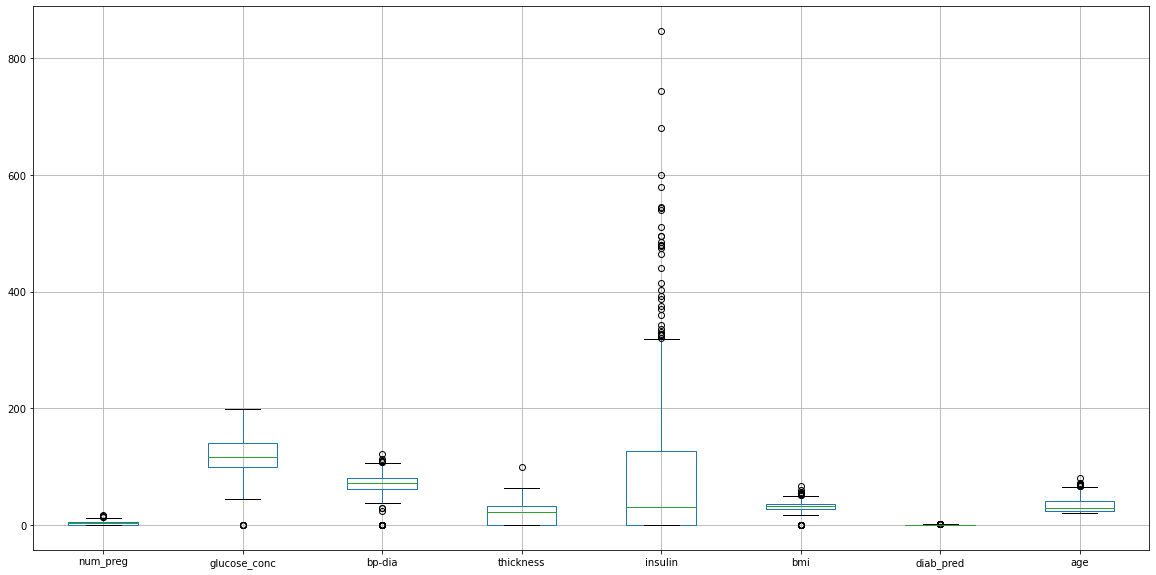

In [5]:
boxplot = df.boxplot(column=['num_preg', 'glucose_conc', 'bp-dia',	'thickness',	'insulin','bmi','diab_pred',	'age'],figsize=(20,10))

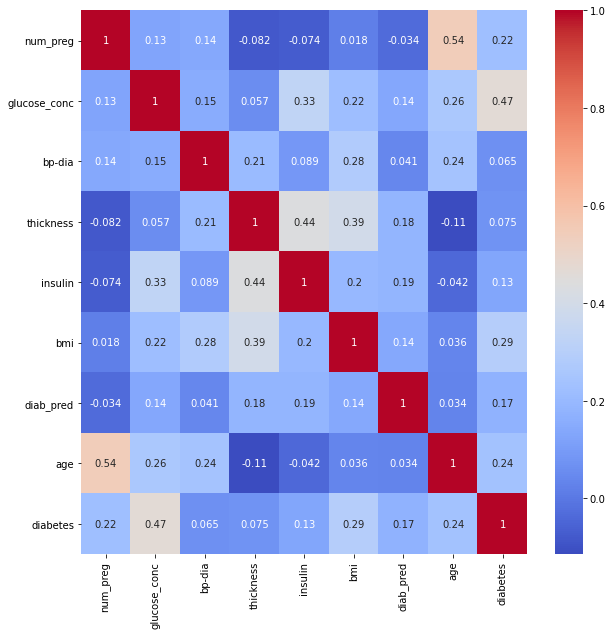

In [6]:
#************correlation***********************
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm");

## Data Preprocessing

In [7]:
df.isnull().values.any()

False

In [8]:
df.drop(['insulin'],axis=1)

,num_preg,glucose_conc,bp-dia,thickness,bmi,diab_pred,age,diabetes
0,6,148,72,35,33.6,0.627,50,1
1,1,85,66,29,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,23,28.1,0.167,21,0
4,0,137,40,35,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,10,101,76,48,32.9,0.171,63,0
764,2,122,70,27,36.8,0.340,27,0
765,5,121,72,23,26.2,0.245,30,0
766,1,126,60,0,30.1,0.349,47,1


**Feature selection**

In [9]:
#****************Outlier detection**********************
df = df[df['thickness']<80]
df = df[df['insulin']<=600]
print(df.shape)

(764, 9)


In [10]:
#***************Missing VAlues**************************
df.loc[df['glucose_conc']==0,'glucose_conc']=df['glucose_conc'].mean()
df.loc[df['bp-dia']==0,'bp-dia']=df['bp-dia'].mean()
df.loc[df['thickness']==0,'thickness']=df['thickness'].mean()
df.loc[df['bmi']==0,'bmi']=df['bmi'].mean()
df.head(5)

,num_preg,glucose_conc,bp-dia,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148.0,72.0,35.000000,0,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,0,26.6,0.351,31,0
2,8,183.0,64.0,20.390052,0,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168,43.1,2.288,33,1


In [11]:
#*******************Variance Threshold******************
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0)
sel.fit_transform(df)
sum(sel.get_support())
##Saying all the features are important

9

## Normalization

In [12]:
#*********************Standardization********************
# from sklearn.preprocessing import StandardScaler
# scaling = StandardScaler()
# scaling.fit_transform(df[['glucose_conc','bp-dia','thickness','bmi','diab_pred','age']])
# print(scaling.fit(df))
# df.head(5)

#******************Normalization*************************
df = df/df.max()
df.head(5)

,num_preg,glucose_conc,bp-dia,thickness,insulin,bmi,diab_pred,age,diabetes
0,0.352941,0.743719,0.590164,0.555556,0.000000,0.500745,0.259091,0.617284,1.0
1,0.058824,0.427136,0.540984,0.460317,0.000000,0.396423,0.145041,0.382716,0.0
2,0.470588,0.919598,0.524590,0.323652,0.000000,0.347243,0.277686,0.395062,1.0
3,0.058824,0.447236,0.540984,0.365079,0.156667,0.418778,0.069008,0.259259,0.0
4,0.000000,0.688442,0.327869,0.555556,0.280000,0.642325,0.945455,0.407407,1.0


## Train Test Data Split

In [13]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]
x.shape,y.shape

((764, 8), (764,))

In [14]:
df.head(5)

,num_preg,glucose_conc,bp-dia,thickness,insulin,bmi,diab_pred,age,diabetes
0,0.352941,0.743719,0.590164,0.555556,0.000000,0.500745,0.259091,0.617284,1.0
1,0.058824,0.427136,0.540984,0.460317,0.000000,0.396423,0.145041,0.382716,0.0
2,0.470588,0.919598,0.524590,0.323652,0.000000,0.347243,0.277686,0.395062,1.0
3,0.058824,0.447236,0.540984,0.365079,0.156667,0.418778,0.069008,0.259259,0.0
4,0.000000,0.688442,0.327869,0.555556,0.280000,0.642325,0.945455,0.407407,1.0


In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=25, random_state =42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(739, 8)
(739,)
(25, 8)
(25,)


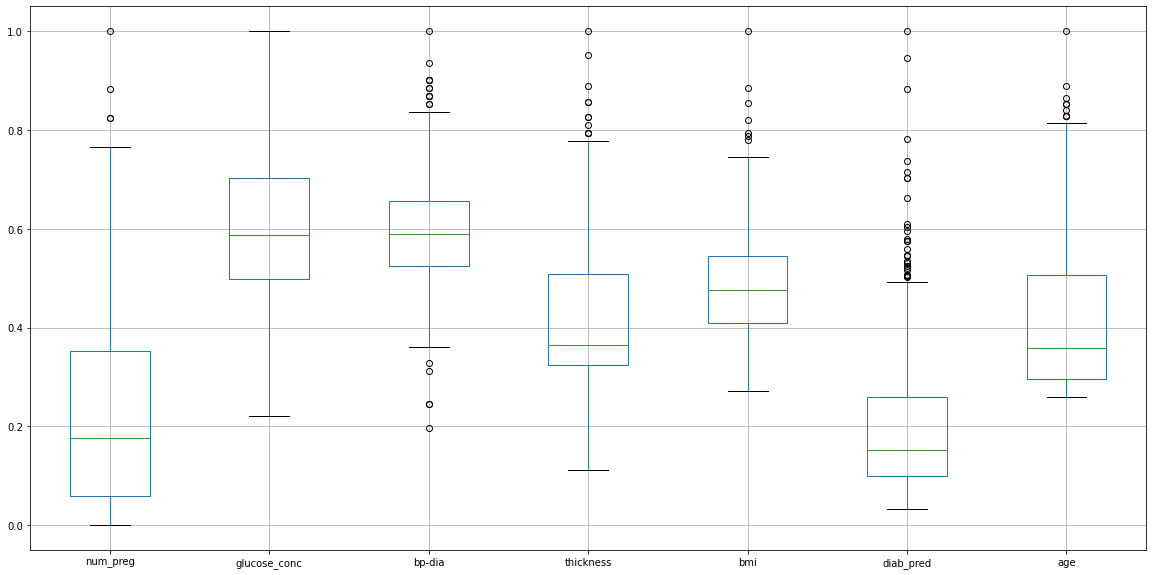

In [16]:
boxplot = df.boxplot(column=['num_preg', 'glucose_conc', 'bp-dia',	'thickness','bmi','diab_pred',	'age'],figsize=(20,10))

## Training Models & Prediction Accuracy Score

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 

from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

log_clf = LogisticRegression(max_iter=1000,solver='lbfgs')
rnd_clf = RandomForestClassifier(n_estimators =8,criterion = 'entropy',random_state =7)
svm_clf = SVC()#rbf
svm_pl_clf = SVC(kernel='poly')
svm_lin_clf = SVC(kernel='linear')
det_clf = DecisionTreeClassifier(max_depth=1)
knn_clf = KNeighborsClassifier(n_neighbors=2)
nbg_clf = GaussianNB()

for clf in (log_clf, rnd_clf, svm_clf,svm_pl_clf, svm_lin_clf, det_clf, knn_clf, nbg_clf):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__,"\nAccuracy_score: ",100*accuracy_score(y_test, y_pred))
    print("F1-score: ",100*f1_score(y_test, y_pred, average="macro"))
    print("Precision: ",100*precision_score(y_test, y_pred, average="macro"))
    print("Recall score: ",100*recall_score(y_test, y_pred, average="macro"))
    print("**********************************************************")

LogisticRegression 
Accuracy_score:  92.0
F1-score:  90.07936507936508
Precision:  90.07936507936508
Recall score:  90.07936507936508
**********************************************************
RandomForestClassifier 
Accuracy_score:  84.0
F1-score:  80.15873015873017
Precision:  80.15873015873017
Recall score:  80.15873015873017
**********************************************************
SVC 
Accuracy_score:  88.0
F1-score:  85.71428571428571
Precision:  84.55882352941177
Recall score:  87.3015873015873
**********************************************************
SVC 
Accuracy_score:  88.0
F1-score:  85.71428571428571
Precision:  84.55882352941177
Recall score:  87.3015873015873
**********************************************************
SVC 
Accuracy_score:  92.0
F1-score:  90.07936507936508
Precision:  90.07936507936508
Recall score:  90.07936507936508
**********************************************************
DecisionTreeClassifier 
Accuracy_score:  84.0
F1-score:  81.61764705882352
Pre

# Ensemble Models

In [18]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


## Adaboosting with different classifiers

In [19]:
#*******************Adaboost Classifier******************
from sklearn.ensemble import AdaBoostClassifier

ab_logr_clf = AdaBoostClassifier(base_estimator=LogisticRegression(), n_estimators=500, learning_rate=1.2, algorithm='SAMME')
ab_gnb_clf = AdaBoostClassifier(base_estimator=GaussianNB(), n_estimators=500, learning_rate=0.8, algorithm='SAMME')
ab_rf_clf = AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=1), n_estimators=500, learning_rate=0.5, algorithm='SAMME')
ab_svc_clf = AdaBoostClassifier(base_estimator=SVC(), n_estimators=500, learning_rate=0.7, algorithm='SAMME')
ab_svcpoly_clf = AdaBoostClassifier(base_estimator=SVC(kernel='poly'), n_estimators=500, learning_rate=0.7, algorithm='SAMME')
ab_svclin_clf = AdaBoostClassifier(base_estimator=SVC(kernel='linear'), n_estimators=500, learning_rate=0.7, algorithm='SAMME')
ab_dt_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=500, learning_rate=0.6, algorithm='SAMME')
# ab_knn_clf = AdaBoostClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3), n_estimators=500, learning_rate=0.5, algorithm='SAMME')
# ab_nn_clf = AdaBoostClassifier(base_estimator=MLPClassifier(), n_estimators=500, learning_rate=0.5, algorithm='SAMME')

print('Adaboosting with different classifiers \n')
for clf,name in ((ab_logr_clf,'Logistic Regression'), (ab_gnb_clf,'Naive Bayes'), (ab_rf_clf,'Random Forest'), (ab_svc_clf,'SVM(rbf)'), (ab_svcpoly_clf,'SVM(poly)'), (ab_svclin_clf,'SVM(linear)'), (ab_dt_clf,'Decision Tree')):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(name)
    print('Accuracy: ',100*accuracy_score(y_test, y_pred))
    print('Precision: ',100*precision_score(y_test,y_pred, average="macro"))
    print('Recall: ',100*recall_score(y_test,y_pred, average="macro"))
    print('F1 score: ',100*f1_score(y_test,y_pred, average="macro"))
    print(' ')

Adaboosting with different classifiers 

Logistic Regression
Accuracy:  92.0
Precision:  90.07936507936508
Recall:  90.07936507936508
F1 score:  90.07936507936508
 
Naive Bayes
Accuracy:  88.0
Precision:  84.55882352941177
Recall:  87.3015873015873
F1 score:  85.71428571428571
 
Random Forest
Accuracy:  80.0
Precision:  76.66666666666666
Recall:  81.74603174603175
F1 score:  77.71836007130123
 
SVM(rbf)
Accuracy:  72.0
Precision:  36.0
Recall:  50.0
F1 score:  41.860465116279066
 
SVM(poly)
Accuracy:  96.0
Precision:  97.36842105263158
Recall:  92.85714285714286
F1 score:  94.8024948024948
 
SVM(linear)
Accuracy:  72.0
Precision:  36.0
Recall:  50.0
F1 score:  41.860465116279066
 
Decision Tree
Accuracy:  88.0
Precision:  85.0
Recall:  91.66666666666667
F1 score:  86.63101604278074
 


In [20]:
#Importing ensembles
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

#**********************CATBOOST*****************************
catboost = CatBoostClassifier(iterations=10,learning_rate=1,depth=2,loss_function='MultiClass')
catboost.fit(x_train,y_train)
y_pred = catboost.predict(x_test)
print("CATBOOSTING \n","Accuracy: ",100*accuracy_score(y_test, y_pred))
print("F1-score: ",100*f1_score(y_test, y_pred, average="macro"))
print("Precision Tree: ",100*precision_score(y_test, y_pred, average="macro"))
print("Recall score: ",100*recall_score(y_test, y_pred, average="macro"))
print("**********************************************************")

#**********************XGBOOST*******************************
xg_boost = XGBClassifier(base_score=0.1,verbosity=0,learning_rate=0.3)
xg_boost.fit(x_train,y_train)
y_pred = xg_boost.predict(x_test)
print("XGBOOSTING \n","Accuracy: ",100*accuracy_score(y_test, y_pred))
print("F1-score: ",100*f1_score(y_test, y_pred, average="macro"))
print("Precision Tree: ",100*precision_score(y_test, y_pred, average="macro"))
print("Recall score: ",100*recall_score(y_test, y_pred, average="macro"))
print("**********************************************************")

0:	learn: 0.5395274	total: 585ms	remaining: 5.26s
1:	learn: 0.5063356	total: 586ms	remaining: 2.34s
2:	learn: 0.4743613	total: 587ms	remaining: 1.37s
3:	learn: 0.4566012	total: 588ms	remaining: 882ms
4:	learn: 0.4526578	total: 589ms	remaining: 589ms
5:	learn: 0.4477677	total: 589ms	remaining: 393ms
6:	learn: 0.4303853	total: 590ms	remaining: 253ms
7:	learn: 0.4242197	total: 591ms	remaining: 148ms
8:	learn: 0.4180898	total: 591ms	remaining: 65.7ms
9:	learn: 0.4139692	total: 592ms	remaining: 0us
CATBOOSTING 
 Accuracy:  80.0
F1-score:  77.71836007130123
Precision Tree:  76.66666666666666
Recall score:  81.74603174603175
**********************************************************
XGBOOSTING 
 Accuracy:  84.0
F1-score:  82.6388888888889
Precision Tree:  81.81818181818181
Recall score:  88.88888888888889
**********************************************************


[0.77124183 0.73856209 0.77124183 0.80392157 0.75      ]
**********************************************************
[0.73856209 0.67320261 0.7254902  0.75816993 0.73684211]
**********************************************************
[0.78431373 0.7254902  0.77777778 0.77777778 0.76973684]
**********************************************************
[0.76470588 0.75163399 0.78431373 0.79084967 0.78947368]
**********************************************************
[0.76470588 0.75816993 0.76470588 0.79738562 0.75657895]
**********************************************************
[0.77124183 0.73856209 0.79738562 0.79084967 0.76973684]
